## Prepare

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 86.1 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) 
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as de

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install

In [ ]:
!rm -rf ctcdecode
%cd /content
!git clone --recursive -q https://github.com/parlance/ctcdecode.git
!cd ctcdecode && pip install -q .
%cd /content

/content
  Preparing metadata (setup.py) ... done
/content


In [ ]:
!rm -rf Wav2Vec2_PyCTCDecode
!git clone --recursive https://github.com/patrickvonplaten/Wav2Vec2_PyCTCDecode.git

Cloning into 'Wav2Vec2_PyCTCDecode'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 49 (delta 22), reused 15 (delta 5), pack-reused 0
Unpacking objects: 100% (49/49), 14.97 KiB | 1.36 MiB/s, done.


In [ ]:
!pip install -q torchaudio
!pip install -q transformers>=4.12.0
!pip install -q datasets
!pip install -q lang_trans
!pip install -q arabic_reshaper
!pip install -q python-bidi
!pip install -q pydub
!pip install -q soundfile
!pip install -q jiwer
!pip install -q PyArabic
!pip install -q ctc-segmentation
!pip install -q pyctcdecode
!pip install -q https://github.com/kpu/kenlm/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 KB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.7/402.7 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 550.9/550.9 KB 7.5 MB/s eta 0:00:00
  Preparing metadat

In [ ]:
%cd Wav2Vec2_PyCTCDecode

/content/Wav2Vec2_PyCTCDecode


# Imports

In [ ]:
import transformers
transformers.utils.move_cache()

Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
import tensorflow as tf

In [ ]:
import os
import re
import sys
import json
import torch
import jiwer
import kenlm
import logging
import librosa
import datasets
import itertools
import torchaudio
import numpy as np
import transformers
import pandas as pd
from torch import nn
import seaborn as sns
import torch.nn as nn
from tqdm import tqdm
import soundfile as sf
import arabic_reshaper
import ctc_segmentation
from jiwer import wer,cer
from pyarabic import araby
from packaging import version
from pydub import AudioSegment
from dataclasses import asdict
import matplotlib.pyplot as plt
from pydub.utils import mediainfo
from argparse import ArgumentParser
from collections import defaultdict
from torch.nn import functional as F
from contextlib import contextmanager
from bidi.algorithm import get_display
from pyctcdecode import build_ctcdecoder
from lang_trans.arabic import buckwalter
from dataclasses import dataclass, field
from sklearn.metrics import accuracy_score
from typing import Any, Dict, List, Optional, Union
from sklearn.model_selection import train_test_split
from datasets import load_dataset, Dataset,load_metric
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import HfArgumentParser,TrainingArguments
from sklearn.metrics import classification_report, confusion_matrix
from transformers.trainer_utils import get_last_checkpoint, is_main_process
from transformers import is_apex_available,set_seed ,Trainer,Wav2Vec2FeatureExtractor
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Wav2Vec2Model,Wav2Vec2PreTrainedModel
%matplotlib inline

# Prepare the private dataset

In [ ]:
!cp -r /content/drive/MyDrive/KFUPM-Master/ICS606/Dataset/dataset_wav.zip .

In [ ]:
if os.path.exists('dataset_wav'):
  if len(os.listdir('dataset_wav')) == 0:
    os.system('unzip dataset_wav.zip')
else:
  os.system('unzip dataset_wav.zip')

In [ ]:
metadata_path = '/content/drive/MyDrive/KFUPM-Master/ICS606/Dataset/metadata.xlsx'
test_metadata_path = '/content/drive/MyDrive/KFUPM-Master/ICS606/Dataset/test_metadata.xlsx'

In [ ]:
!cp $metadata_path .
!cp $test_metadata_path .

In [ ]:
dataset_wav_folder = 'dataset_wav'

In [ ]:
def preprocess_metadata(metadata):
  metadata['Bahr'] = metadata['Bahr'].apply(lambda bahr: bahr.strip() if isinstance(bahr,str) else bahr)
  metadata['Clean Script'] = metadata['Script'].apply(lambda script: araby.strip_tashkeel(araby.strip_tatweel(script)))
  metadata['File Exist'] = metadata['Utterance name'].apply(lambda file_name: os.path.isfile(f'{dataset_wav_folder}/{file_name}'))
  metadata = metadata[metadata['File Exist'] == True]
  return metadata

In [ ]:
metadata = preprocess_metadata(pd.read_excel(metadata_path))
test_metadata = preprocess_metadata(pd.read_excel(test_metadata_path))
train_metadata = metadata[[script not in test_metadata['No.'].values for script in metadata['No.']]]
train_metadata

,No.,Utterance name,Script,Bahr,Source,Name when extacted,Original name in document,Is_Malformed,Reciter_Label,Reciter_Gender,Further info on Bahr,Name of document,Clean Script,File Exist
0,1.0,P-1.aac,شتَّ شَعبُ الحيِّ بعدَ التئامْ وشجاكَ الر...,المديد,ديوان الطرماح ص227,1.aac,1.aac,0.0,0.0,0.0,NaN,بحر المديد,شت شعب الحي بعد التئام وشجاك الربع ربع ال...,True
1,2.0,P-2.aac,حَسَرَتْ عَنْهُ الرِّيَاحُ فَأَبْدَتْ من...,المديد,ديوان الطرماح ص227,2.aac,2.aac,0.0,0.0,0.0,NaN,NaN,حسرت عنه الرياح فأبدت منتأى كالقرو رهن ا...,True
2,3.0,P-3.aac,وخصيفَ اللَّونِ جادَتْ بهِ مَرْخَةٌ مِنْ ...,المديد,ديوان الطرماح ص227,3.aac,3.aac,0.0,0.0,0.0,NaN,NaN,وخصيف اللون جادت به مرخة من مخدج أو تمام,True
3,4.0,P-4.aac,بَيْنَ أظْآرٍ بِمَظْلُومَةٍ كَسَرَاةِ الس...,المديد,ديوان الطرماح ص227,4.aac,4.aac,0.0,0.0,0.0,NaN,NaN,بين أظآر بمظلومة كسراة الساق ساق الحمام,True
4,5.0,P-5.aac,مَنْزِلًا كَانَ لَنَا مَرَّةً وطنًا نحتلّ...,المديد,ديوان الطرماح ص227,5.aac,5.aac,0.0,0.0,0.0,NaN,NaN,منزلا كان لنا مرة وطنا نحتله كل عام,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,3731.0,P-3731.mp3,وَلِّ السَلاطينَ مَن تَوَلّاها وَاِلجَأ إ...,المنسرح,-,45.mp3,45.mp3,NaN,NaN,NaN,NaN,NaN,ول السلاطين من تولاها والجأ إليه تكن حدياها,True
3682,3732.0,P-3732.mp3,وَلا تَغُرَّنَّكَ الإِمارَةُ في غَيرِ أَم...,المنسرح,-,46.mp3,46.mp3,NaN,NaN,NaN,NaN,NaN,ولا تغرنك الإمارة في غير أمير وإن بها باهى,True
3683,3733.0,P-3733.mp3,فَإِنَّما المَلكُ رَبُّ مَملَكَةٍ قَد فَغ...,المنسرح,-,47.mp3,47.mp3,NaN,NaN,NaN,NaN,NaN,فإنما الملك رب مملكة قد فغم الخافقين سرياها,True
3684,3734.0,P-3734.mp3,مُبتَسِمٌ وَالوُجوهُ عابِسَةٌ سِلمُ العِد...,المنسرح,-,48.mp3,48.mp3,NaN,NaN,NaN,NaN,NaN,مبتسم والوجوه عابسة سلم العدى عنده كهيجاها,True


In [ ]:
test_metadata

,No.,Utterance name,Script,Bahr,Source,Name when extacted,Original name in document,Further info on Bahr,Name of document,Clean Script,File Exist
0,89.0,P-89.aac,إنَّ بالشِّعبِ الَّذي دُونَ سَلْعٍ لَقتيل...,المديد,ديوان ثابت بن جابرص35,89.aac,89.aac,NaN,NaN,إن بالشعب الذي دون سلع لقتيلا دمه ما يطل,True
1,90.0,P-90.aac,خَلَّفَ الْعِبْءَ عَلَيَّ وَولَّى أنا بال...,المديد,ديوان ثابت بن جابرص35,90.aac,90.aac,NaN,NaN,خلف العبء علي وولى أنا بالعبء له مستقل,True
2,91.0,P-91.aac,ووراءَ الثَّأر منِّي ابنُ أختٍ مَصِعٌ عُق...,المديد,ديوان ثابت بن جابرص35,91.aac,91.aac,NaN,NaN,ووراء الثأر مني ابن أخت مصع عقدته ما تحل,True
3,92.0,P-92.aac,مُطْرِقٌ يَرْشَحُ سَمًّا كَمَا أَطْ رَقَ ...,المديد,ديوان ثابت بن جابرص35,92.aac,92.aac,NaN,NaN,مطرق يرشح سما كما أط رق أفعى ينفث السم صل,True
4,93.0,P-93.aac,خبرٌ ما نابَنا مُصْمَئِلٌّ جلَّ حتّى دقَّ...,المديد,ديوان ثابت بن جابرص35,93.aac,93.aac,NaN,NaN,خبر ما نابنا مصمئل جل حتى دق فيه الأجل,True
...,...,...,...,...,...,...,...,...,...,...,...
354,3682.0,P-3682.m4a,حِسانُ الوُجوهِ حِدادُ السُيو فِ يَبتَدِر...,المتقارب,ديوان قيس بن الخطيم ص 73,ÇáÊÓÌíá (98).m4a,التسجيل (98).m4a,NaN,NaN,حسان الوجوه حداد السيو ف يبتدر المجد شبانها,True
355,3683.0,P-3683.m4a,وَبِالشَوطِ مِن يَثرِبٍ أَعبُدٌ سَتَهلِكُ...,المتقارب,ديوان قيس بن الخطيم ص 73,ÇáÊÓÌíá (99).m4a,التسجيل (99).m4a,NaN,NaN,وبالشوط من يثرب أعبد ستهلك في الخمر أثمانها,True
356,3684.0,P-3684.m4a,يَهونُ عَلى الأَوسِ أَثمانُهُم إِذا راحَ ...,المتقارب,ديوان قيس بن الخطيم ص 73,ÇáÊÓÌíá (100).m4a,التسجيل (100).m4a,NaN,NaN,يهون على الأوس أثمانهم إذا راح يخطر نشوانها,True
357,3685.0,P-3685.m4a,أَتَتهُم عَرانينُ مِن مالِكٍ سِراعٌ إِلى ...,المتقارب,ديوان قيس بن الخطيم ص 73,ÇáÊÓÌíá (101).m4a,التسجيل (101).m4a,NaN,NaN,أتتهم عرانين من مالك سراع إلى الروع فتيانها,True


# Create wrapper classes

In [ ]:
lm_path = "/content/drive/MyDrive/KFUPM-Master/ICS606/Models/baits_dataset_kenlm_model.arpa"

In [ ]:
!python fix_lm.py --path_to_ngram /content/drive/MyDrive/KFUPM-Master/ICS606/Models/baits_dataset_kenlm_model.arpa --path_to_fixed fixed_baits_dataset_kenlm.arpa

In [ ]:
fixed_lm_path = 'fixed_baits_dataset_kenlm.arpa'

In [ ]:
resamplers = {  # all three sampling rates exist in test split
    48000: torchaudio.transforms.Resample(48000, 16000),
    44100: torchaudio.transforms.Resample(44100, 16000),
    32000: torchaudio.transforms.Resample(32000, 16000),
}

def get_resampled_speech(file_path):
    original_speech, sampling_rate = torchaudio.load(file_path)
    if sampling_rate in resamplers:
        speech = resamplers[sampling_rate](original_speech[0]).squeeze().numpy()
    else:
        speech = resamplers[48000](original_speech[0]).squeeze().numpy()
    return speech

In [ ]:
class Transcriber:
    def __init__(self, model_path, processor_path="bakrianoo/sinai-voice-ar-stt"):
        self.processor = Wav2Vec2Processor.from_pretrained(processor_path)
        self.model = Wav2Vec2ForCTC.from_pretrained(model_path).eval()
        self.model.to("cuda")

    def transcribe(self, file_path=None,speech_array=None, with_ctc=True):
        assert file_path or speech_array, "file path or speech_array should be passed"
        if file_path:
          speech, sampling_rate = librosa.load(file_path, sr=16_000)
        else:
          speech = np.array(speech_array,dtype=np.float32)
        inputs = self.processor(
            speech, sampling_rate=16_000, return_tensors="pt", padding=True
        )
        with torch.no_grad():
          logits = self.model(inputs.input_values.to('cuda')).logits
          for logit in logits:
            logit[logit==-100] = self.processor.tokenizer.pad_token_id
          predicted = torch.argmax(logits, dim=-1)
        # predicted[predicted == -100] = self.processor.tokenizer.pad_token_id
        predicted_tokenized = self.processor.tokenizer.batch_decode(predicted)
        clean_predicted_tokenized = [araby.strip_tashkeel(araby.strip_tatweel(predicted_tokenized[0]))]
        # cleaning
        clean_predicted_tokenized = [shatr.replace('[UNK]','') for shatr in clean_predicted_tokenized]
        clean_predicted_tokenized = [re.sub('\s+',' ',shatr).strip() for shatr in clean_predicted_tokenized]
        return clean_predicted_tokenized

In [ ]:
class CTCTranscriber:
    def __init__(self, model_path, lm_model_path='fixed_baits_dataset_kenlm.arpa', processor_path="bakrianoo/sinai-voice-ar-stt"):
        self.processor = Wav2Vec2Processor.from_pretrained(processor_path)
        self.model = Wav2Vec2ForCTC.from_pretrained(model_path).eval()
        self.model.to("cuda")
        self.lm_model_path = lm_model_path
        self.decoder = build_ctcdecoder(
            self.vocab,
            self.lm_model_path,
            alpha=0.5,
        )

    @property
    def vocab(self):
      vocab_dict = self.processor.tokenizer.get_vocab()
      sort_vocab = sorted((value, key) for (key,value) in vocab_dict.items())
      vocab = [token for _,token in sort_vocab]
      return vocab

    def transcribe(self, file_path=None,speech_array=None, with_ctc=True):
        assert file_path or speech_array, "file path or speech_array should be passed"
        if file_path:
          speech, sampling_rate = librosa.load(file_path, sr=16_000)
        else:
          speech = np.array(speech_array,dtype=np.float32)
        inputs = self.processor(
            speech, sampling_rate=16_000, return_tensors="pt", padding=True
        )
        with torch.no_grad():
          logits = self.model(inputs.input_values.to('cuda')).logits
          for logit in logits:
            logit[logit==-100] = self.processor.tokenizer.pad_token_id
          decoded = [araby.strip_tashkeel(self.decoder.decode(logits.cpu().numpy()[0]))]
          # cleaning
          decoded = [shatr.replace('[UNK]','') for shatr in decoded]
          decoded = [re.sub('\s+',' ',shatr).strip() for shatr in decoded]
        return decoded

In [ ]:
class GheithTextClassifier:
  char2idx = {
    ' ': 0,
    'ء': 1,
    'آ': 2,
    'أ': 3,
    'ؤ': 4,
    'إ': 5,
    'ئ': 6,
    'ا': 7,
    'ب': 8,
    'ة': 9,
    'ت': 10,
    'ث': 11,
    'ج': 12,
    'ح': 13,
    'خ': 14,
    'د': 15,
    'ذ': 16,
    'ر': 17,
    'ز': 18,
    'س': 19,
    'ش': 20,
    'ص': 21,
    'ض': 22,
    'ط': 23,
    'ظ': 24,
    'ع': 25,
    'غ': 26,
    'ف': 27,
    'ق': 28,
    'ك': 29,
    'ل': 30,
    'م': 31,
    'ن': 32,
    'ه': 33,
    'و': 34,
    'ى': 35,
    'ي': 36,
    'ً': 37,
    'ٌ': 38,
    'ٍ': 39,
    'َ': 40,
    'ُ': 41,
    'ِ': 42,
    'ّ': 43,
    'ْ': 44
  }

  meter_class_to_label = {
    0: 'البسيط',
    1: 'الخفيف',
    2: 'الرجز',
    3: 'الرمل',
    4: 'السريع',
    5: 'الطويل',
    6: 'الكامل',
    7: 'المتدارك',
    8: 'المتقارب',
    9: 'المجتث',
    10: 'المديد',
    11: 'المضارع',
    12: 'المقتضب',
    13: 'المنسرح',
    14: 'الهزج',
    15: 'الوافر',
    16: 'نثر'
  }

  meter_label_to_class = {
    "البسيط": 0,
    "الخفيف": 1,
    "الرجز": 2,
    "الرمل": 3,
    "السريع": 4,
    "الطويل": 5,
    "الكامل": 6,
    "المتدارك": 7,
    "المتقارب": 8,
    "المجتث": 9,
    "المديد": 10,
    "المضارع": 11,
    "المقتضب": 12,
    "المنسرح": 13,
    "الهزج": 14,
    "الوافر": 15,
    "نثر": 16,
}
  def __init__(self, transcriber):
        self.model = tf.keras.models.load_model('/content/drive/MyDrive/KFUPM-Master/ICS606/Models/arabic_poetry_text_classification_model_Gheith.h5')
        self.transcriber = transcriber

  def classify(self, file_path=None, speech_array=None):
      predicted_text = self.transcriber.transcribe(
          file_path=file_path,
          speech_array=speech_array
        )[0]
      predicted_text = araby.strip_tashkeel(predicted_text)
      sequence = [self.char2idx[char]+1 for char in predicted_text if char in self.char2idx.keys()]
      sequence = pad_sequences([sequence], maxlen=128, padding="post", value=0)
      predictions = self.model.predict(sequence)[0]
      class_ = np.argmax(predictions, 0).astype("int")
      return self.meter_class_to_label[class_]

# Create Objects

In [ ]:
fintuned_sinal_model_path = '/content/drive/MyDrive/KFUPM-Master/ICS606/Models/SinaiFineTuned/checkpoint-1800'

In [ ]:
transcriber = Transcriber(model_path=fintuned_sinal_model_path)

In [ ]:
classifier = GheithTextClassifier(transcriber=transcriber)

In [ ]:
ctc_transcriber = CTCTranscriber(model_path=fintuned_sinal_model_path)

In [ ]:
ctc_classifier = GheithTextClassifier(transcriber=ctc_transcriber)

# Evaluate

## Prepare and Create the datasets objects

In [ ]:
# This dict is used for the benchmark dataset where the meter names are in English
bahr_en_ar_map = {'baseet':'البسيط',
 'hazaj':'الهزج',
 'kamel':'الكامل',
 'khafeef':'الخفيف',
 'madeed':'المديد',
 'mudhare':'المضارع',
 'mujtath':'المجتث',
 'munsareh':'المنسرح',
 'muqtatheb':'المقتضب',
 'mutadarak':'المتدارك',
 'mutakareb':'المتقارب',
 'rajaz':'الرجز',
 'ramal':'الرمل',
 'saree':'السريع',
 'taweel':'الطويل',
 'wafer':'الوافر',
 }

In [ ]:
meter_class_to_label = {v:k for k,v in {
    0: 'البسيط',
    1: 'الخفيف',
    2: 'الرجز',
    3: 'الرمل',
    4: 'السريع',
    5: 'الطويل',
    6: 'الكامل',
    7: 'المتدارك',
    8: 'المتقارب',
    9: 'المجتث',
    10: 'المديد',
    11: 'المضارع',
    12: 'المقتضب',
    13: 'المنسرح',
    14: 'الهزج',
    15: 'الوافر',
    16: 'نثر'
}.items()}

In [ ]:
def compute_metrics(preds,labels):
    named_preds = [meter_class_to_label[item] for item in preds]
    named_labels = [meter_class_to_label[item] for item  in labels]
    print('labels:',named_labels)
    print('predictions:',named_preds)
    acc = accuracy_score(named_labels, named_preds)
    report = classification_report(named_labels, named_preds)
    matrix = confusion_matrix(named_labels, named_preds)
    print(matrix)
    print('clasification report',report)
    print('accuracy',acc)
    return matrix

In [ ]:
private_test_dataset = Dataset.from_pandas(test_metadata)

In [ ]:
benchmark_test_dataset = load_dataset("MagedSaeed/arabic_poetry_speech_benchmark", use_auth_token=True)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/268 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/MagedSaeed___parquet/MagedSaeed--arabic_poetry_speech_benchmark-ddc1f2d240ee27b8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def clean(example):
  bait = example['bait']
  example['clean bait'] = re.sub('\s+',' ',araby.strip_tashkeel(araby.strip_tatweel(bait)).replace('#',' ').replace('(','').replace(')',''))
  return example

In [ ]:
benchmark_test_dataset = benchmark_test_dataset.map(clean)

  0%|          | 0/268 [00:00<?, ?ex/s]

In [ ]:
private_test_dataset = private_test_dataset.map(
    lambda example: {
        **example,
        'Clean Script':re.sub('\s+',' ',example['Clean Script']).strip()
      }
    )

  0%|          | 0/359 [00:00<?, ?ex/s]

## Without LM

### Transcription

#### Private Dataset

In [ ]:
def predict(example):
  example['predicted_text'] = transcriber.transcribe(file_path=f'{dataset_wav_folder}/{example["Utterance name"]}')
  example['predicted_text'] = [shatr.replace('[UNK]','') for shatr in example['predicted_text']]
  example['predicted_text'] = [re.sub('\s+',' ',shatr).strip() for shatr in example['predicted_text']]
  return example

In [ ]:
private_test_dataset = private_test_dataset.map(predict)

  0%|          | 0/359 [00:00<?, ?ex/s]

In [ ]:
for example in private_test_dataset:
  print(example['predicted_text'],example['Clean Script'], '\n')

['إن بالشعب الذي لون سلع لقتي لندمه ما يطل'] إن بالشعب الذي دون سلع لقتيلا دمه ما يطل 

['خلف لعبء علي وولى أنا بالعد له مستقل'] خلف العبء علي وولى أنا بالعبء له مستقل 

['ووراء الثأر مني ابن أخت مصع أقدته ما تحل'] ووراء الثأر مني ابن أخت مصع عقدته ما تحل 

['مطرك يرشح ثم كما أطرق أفعى ينفث السم صيل'] مطرق يرشح سما كما أط رق أفعى ينفث السم صل 

['خبر مانا بنا مصم إل جل حتى دق فيه الأجل'] خبر ما نابنا مصمئل جل حتى دق فيه الأجل 

['بزني الدهر وكان غسوما بأبي جاره ما يذل'] بزني الدهر وكان غشوما بأبي جاره ما يذل 

['شامس في القر حتى إذى م ا ذكت الشعر فبرر وظل'] شامس في القر حتى إذا ما ذكت الشعرى فبرد وظل 

['ياب الجنبين من غير بؤس وندي الكفين شهم مضل'] يابس الجنبين من غير بؤس وندي الكفين شهم مدل 

['ظاعن بالحزم حتى إذى م حل حل الحزم حيث يحل'] ظاعن بالحزم حتى إذا ما حل حل الحزم حيث يحل 

['غيث مزن وامر حيث يجدي وإذا يصطو فليث أبل'] غيث مزن غامر حيث يجدي وإذا يسطو فليث أبل 

['مسبل في الحي أخوى لفل وإذا يعدو فسمع أزل'] مسبل في الحي أحوى رفل وإذا يعدو فسمع أزل 

['وله طعمان أري وشي وكلى الط ع

In [ ]:
print(wer(hypothesis=[pred[0] for pred in private_test_dataset["predicted_text"]], truth=private_test_dataset["Clean Script"]))
print(cer(hypothesis=[pred[0] for pred in private_test_dataset["predicted_text"]], truth=private_test_dataset["Clean Script"]))

0.2271231073074391
0.053033796692799264


#### Benchmark Dataset

In [ ]:
def predict(example):
  predicted_text = transcriber.transcribe(speech_array=example["speech_array"])[0]
  example['predicted_text'] = re.sub('\s+',' ',araby.strip_tashkeel(araby.strip_tatweel(predicted_text)).replace('#',' '))
  return example

In [ ]:
benchmark_test_dataset = benchmark_test_dataset.map(predict)

  0%|          | 0/268 [00:00<?, ?ex/s]

In [ ]:
for example in benchmark_test_dataset['train']:
  print([example['predicted_text']],example['clean bait'], '\n')

['لقد أتعبني الدهر بقصل شر م قصد'] لقد أتعبني الدهر بقصد شر ما قصد 

['أنيق الحسن مياس مليح الخد والقد'] أنيق الحسن مياس مليح الخد والقد 

['لقد هاجلي الوجد قزال باء مصد'] لقد هاج لي الوجد غزال دائم الصد 

['إلى من أشتك ما بيم الإفلاس والجهب'] إلى من أشتكي ما بي من الإفلاس والجهد 

['فداخلت ذوي الأعمال في هزلوفي جب'] فداخلت ذوي الأعما ل في هزل وفي جد 

['وما بيسلوة عنه ولكن قلم عنده'] وما بي سلوة عنه ولكن قل ما عندي 

['فلم أربحن الحرصس والغربة والكد'] فلم أربح من الحرص سوى الغربة والكد 

['له وجه هلالي إذا مالاح في المرد'] له وجه هلالي إذا ما لاح في المرد 

['ففي مقلته سحروفيالريقة كالشهد'] ففي مقلته سحر وفي الريقة كالشهد 

['يقولون سلا عنه وقد حال عن العهد'] يقولون سلا عنه وقد حال عن العهد 

['فإن لم يدنو وحتى ترىرسيم رسا'] فإن لم يدنوا حتى ترى رأسيهما راسا 

['فصورهاهنا فوزا وصورت ما باسا'] فصور هاهنا فوزا وصور ثم عباسا 

['إذا ماا شئت أن تصمع شيئا يعجب الناساة'] إذا ما شئت أن تصن ع شيئا يعجب الناسا 

['لقست بينه ما شبرا فإن زدت فلا باسا'] وقس بينهما شبرا فإن زدت فلا باسا 

['فكذبها

In [ ]:
print(wer(hypothesis=[pred for pred in benchmark_test_dataset['train']["predicted_text"]], truth=benchmark_test_dataset['train']["clean bait"]))
print(cer(hypothesis=[pred for pred in benchmark_test_dataset['train']["predicted_text"]], truth=benchmark_test_dataset['train']["clean bait"]))

0.36233824185631414
0.10432731561280958


### Meter Classification

#### Private Dataset

In [ ]:
def predict(example):
  example['predicted'] = classifier.classify(file_path=f'{dataset_wav_folder}/{example["Utterance name"]}')
  # example['ctc_predicted'] = classifier_with_ctc_transcibier.classify(speech_array=example["speech_array"])
  # example['bahr_ar'] = bahr_en_ar_map[example['bahr']]
  return example

In [ ]:
private_test_dataset = private_test_dataset.map(predict)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_1
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_2
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
......

  0%|          | 0/359 [00:00<?, ?ex/s]

1/1 [==============================] - 0s 307ms/step


In [ ]:
matrix = compute_metrics(
    preds=[example['predicted'] for example in private_test_dataset],
    labels=[example['Bahr'] for example in private_test_dataset]
  )

labels: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


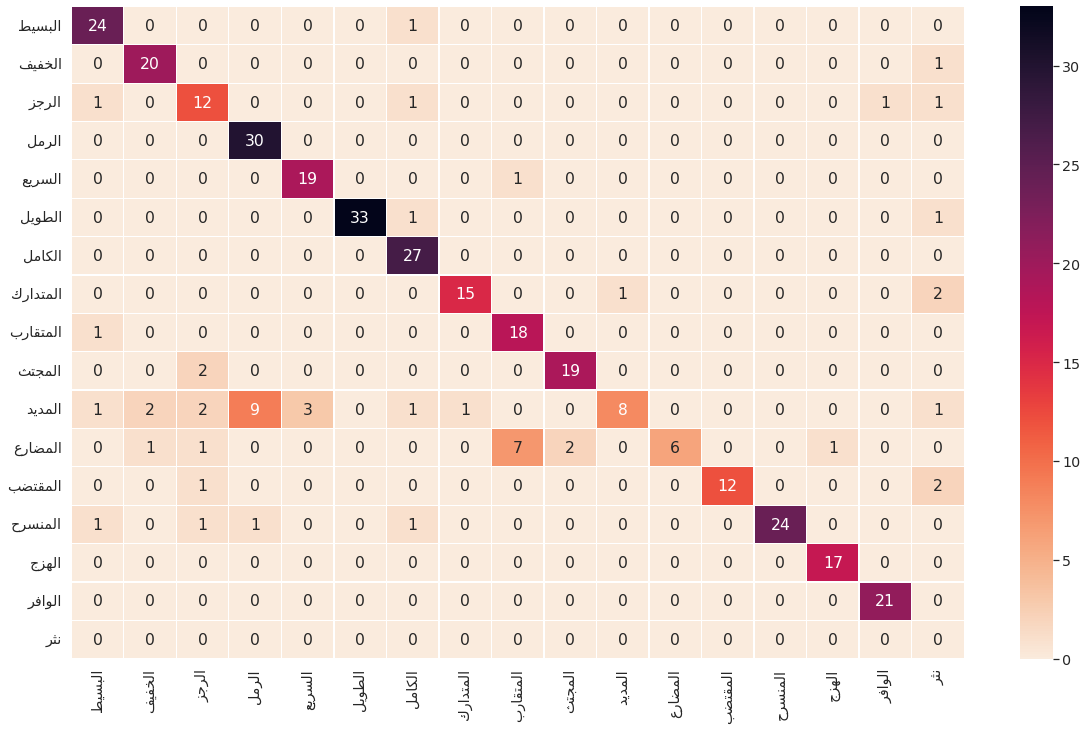

In [ ]:
plt.figure(figsize = (20,12))
sns.set(font_scale=1.3)
# sns.heatmap(matrix, annot=True,linewidths=2)
sns.heatmap(
    matrix,
    annot=True,
    linewidths=.2, 
    cmap="rocket_r",
    xticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()], 
    yticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()],
  )

#### Benchmark Dataset

In [ ]:
def predict(example):
  example['predicted'] = classifier.classify(speech_array=example["speech_array"])
  example['bahr_ar'] = bahr_en_ar_map[example['bahr']]
  return example

In [ ]:
benchmark_test_dataset = benchmark_test_dataset.map(predict)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_1
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_2
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
......

  0%|          | 0/268 [00:00<?, ?ex/s]

1/1 [==============================] - 0s 303ms/step


In [ ]:
matrix = compute_metrics(
    preds=[example['predicted'] for example in benchmark_test_dataset['train']],
    labels=[example['bahr_ar'] for example in benchmark_test_dataset['train']]
  )

labels: [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
predictions: [14, 14, 14, 14, 14, 16, 14, 14, 16, 14, 16, 14, 14, 14, 14, 14, 7, 3, 3, 3, 0, 3, 8,

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


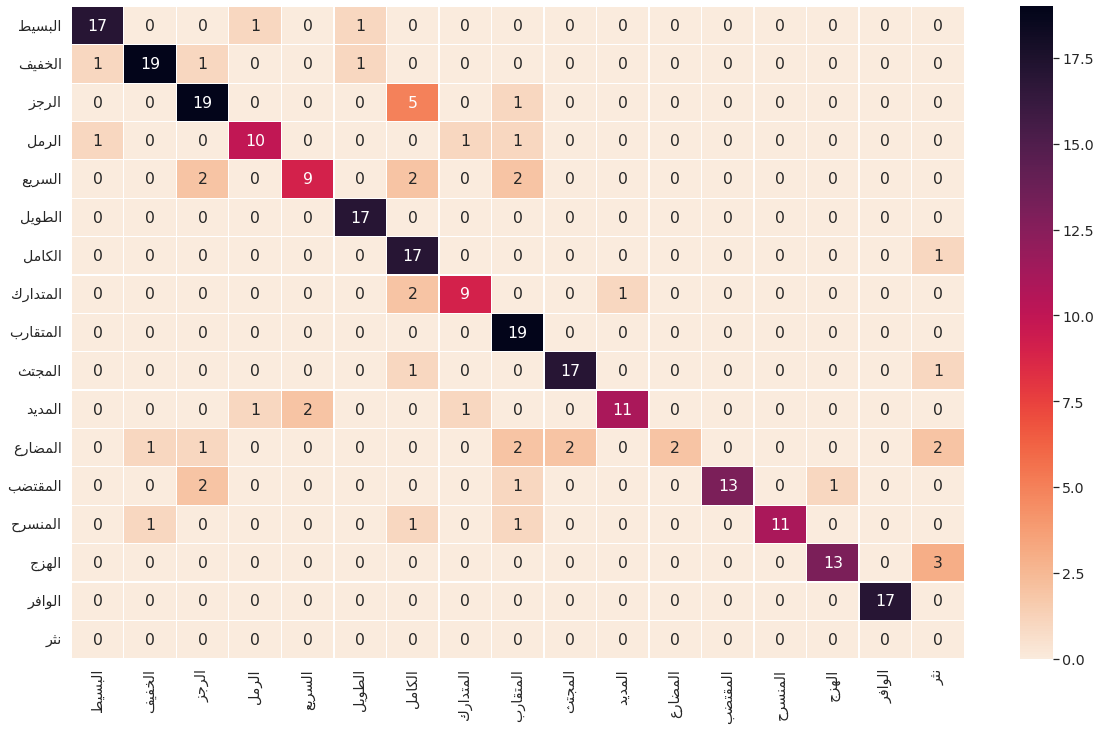

In [ ]:
plt.figure(figsize = (20,12))
sns.set(font_scale=1.3)
# sns.heatmap(matrix, annot=True,linewidths=2)
sns.heatmap(
    matrix,
    annot=True,
    linewidths=.2, 
    cmap="rocket_r",
    xticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()], 
    yticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()],
  )

## With LM

### Transcription

#### Private Dataset

In [ ]:
def predict(example):
  example['predicted_text'] = ctc_transcriber.transcribe(file_path=f'{dataset_wav_folder}/{example["Utterance name"]}')
  return example

In [ ]:
private_test_dataset = private_test_dataset.map(predict)

  0%|          | 0/359 [00:00<?, ?ex/s]

In [ ]:
print(wer(hypothesis=[pred[0] for pred in private_test_dataset["predicted_text"]], truth=private_test_dataset["Clean Script"]))
print(cer(hypothesis=[pred[0] for pred in private_test_dataset["predicted_text"]], truth=private_test_dataset["Clean Script"]))

0.10730743910467412
0.02747216549179788


#### Benchmark Dataset

In [ ]:
def predict(example):
  predicted_text = ctc_transcriber.transcribe(speech_array=example["speech_array"])[0]
  example['predicted_text'] = re.sub('\s+',' ',araby.strip_tashkeel(araby.strip_tatweel(predicted_text)).replace('#',' '))
  return example

In [ ]:
benchmark_test_dataset = benchmark_test_dataset.map(predict)

  0%|          | 0/268 [00:00<?, ?ex/s]

In [ ]:
print(wer(hypothesis=[pred for pred in benchmark_test_dataset['train']["predicted_text"]], truth=benchmark_test_dataset['train']["clean bait"]))
print(cer(hypothesis=[pred for pred in benchmark_test_dataset['train']["predicted_text"]], truth=benchmark_test_dataset['train']["clean bait"]))

0.21954484605087016
0.07756509117300191


### Meter Classification

#### Private Dataset

In [ ]:
def predict(example):
  example['predicted'] = ctc_classifier.classify(file_path=f'{dataset_wav_folder}/{example["Utterance name"]}')
  # example['ctc_predicted'] = classifier_with_ctc_transcibier.classify(speech_array=example["speech_array"])
  # example['bahr_ar'] = bahr_en_ar_map[example['bahr']]
  return example

In [ ]:
private_test_dataset = private_test_dataset.map(predict)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_1
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_2
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
......

  0%|          | 0/359 [00:00<?, ?ex/s]

1/1 [==============================] - 0s 307ms/step


In [ ]:
matrix = compute_metrics(
    preds=[example['predicted'] for example in private_test_dataset],
    labels=[example['Bahr'] for example in private_test_dataset]
  )

labels: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


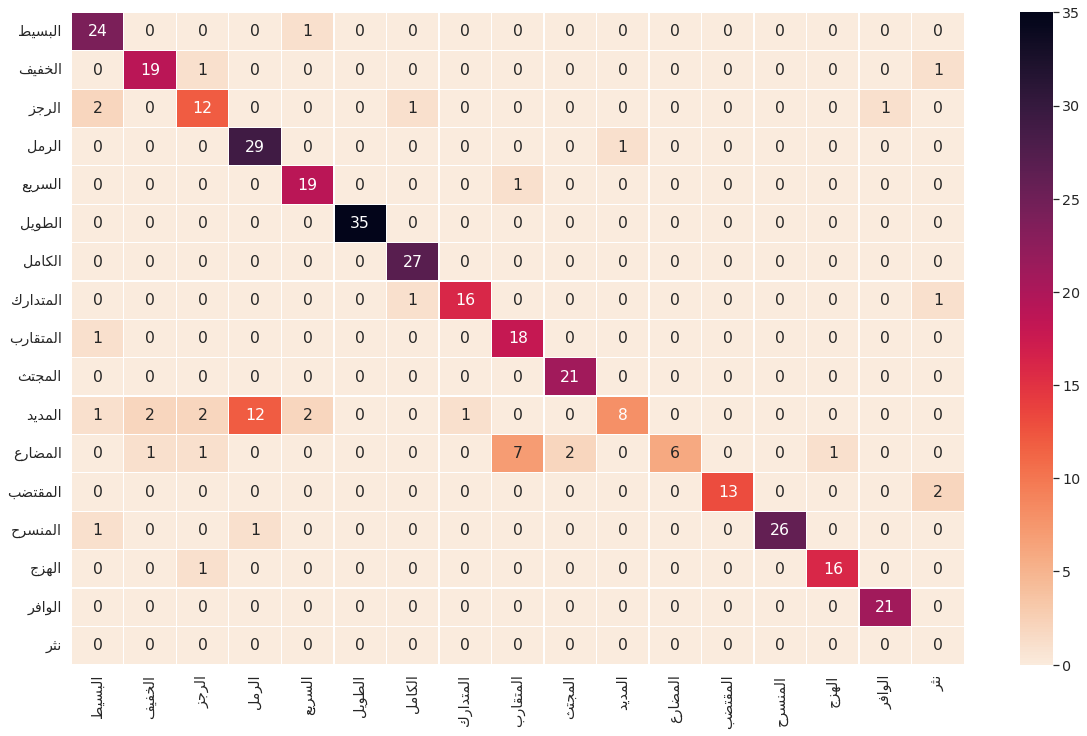

In [ ]:
plt.figure(figsize = (20,12))
sns.set(font_scale=1.3)
# sns.heatmap(matrix, annot=True,linewidths=2)
sns.heatmap(
    matrix,
    annot=True,
    linewidths=.2, 
    cmap="rocket_r",
    xticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()], 
    yticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()],
  )

#### Benchmark Dataset

In [ ]:
def predict(example):
  example['predicted'] = ctc_classifier.classify(speech_array=example["speech_array"])
  example['bahr_ar'] = bahr_en_ar_map[example['bahr']]
  return example

In [ ]:
benchmark_test_dataset = benchmark_test_dataset.map(predict)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_1
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_2
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
......

  0%|          | 0/268 [00:00<?, ?ex/s]

1/1 [==============================] - 0s 324ms/step


In [ ]:
matrix = compute_metrics(
    preds=[example['predicted'] for example in benchmark_test_dataset['train']],
    labels=[example['bahr_ar'] for example in benchmark_test_dataset['train']]
  )

labels: [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
predictions: [14, 14, 14, 14, 2, 14, 14, 14, 14, 14, 16, 2, 14, 14, 14, 14, 3, 3, 3, 3, 0, 3, 2, 3

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


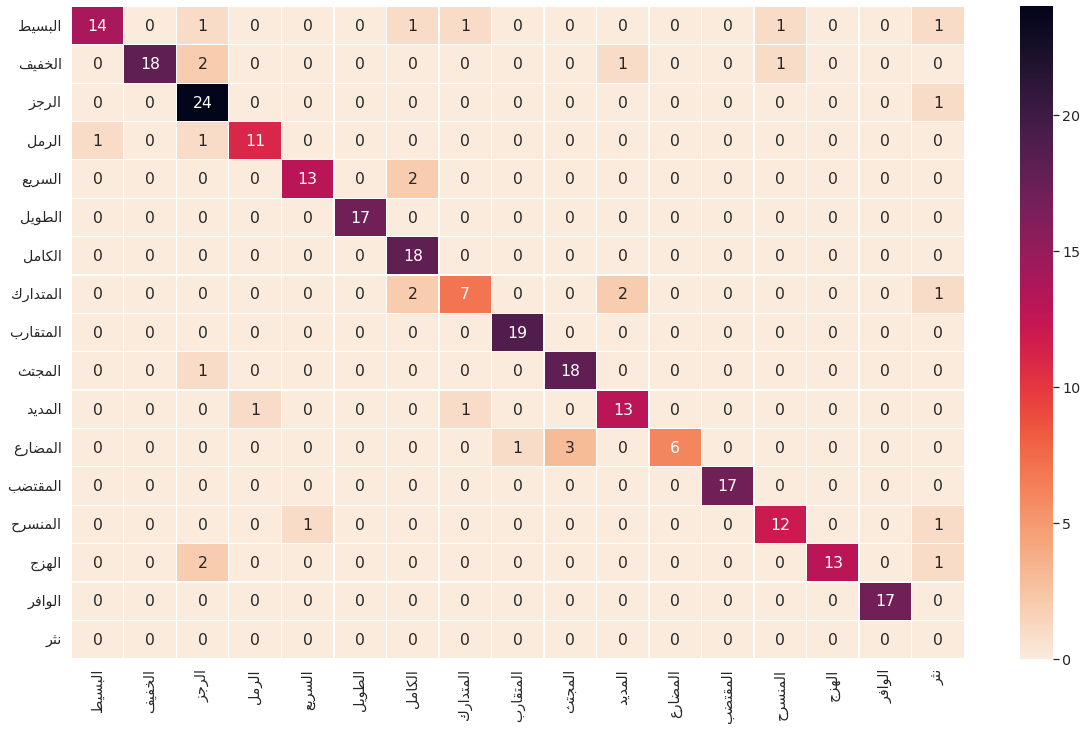

In [ ]:
plt.figure(figsize = (20,12))
sns.set(font_scale=1.3)
# sns.heatmap(matrix, annot=True,linewidths=2)
sns.heatmap(
    matrix,
    annot=True,
    linewidths=.2, 
    cmap="rocket_r",
    xticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()], 
    yticklabels=[get_display(arabic_reshaper.reshape(key)) for key in meter_class_to_label.keys()],
  )